In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams['axes.labelpad'] = 15
plt.rcParams.update({'font.size': 16})

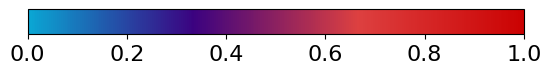

In [4]:
# Define the colors
start_color = "#0AA7D4"
middle_color = "#3B0280"
end_color = "#DD4040"
end_end_color = "#CB0202"

num_colors = 10

# Create the gradient list of colors
gradient = mcolors.LinearSegmentedColormap.from_list("custom_gradient", [start_color, middle_color, end_color, end_end_color], N=num_colors)
gradient_colors = [mcolors.rgb2hex(gradient(i/num_colors)) for i in range(num_colors)]

# Create a colormap
nml_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", gradient_colors)

# Display the colormap
plt.imshow([[0,1]], aspect='auto', cmap=nml_cmap)
plt.gca().set_visible(False)
plt.colorbar(cmap=nml_cmap, orientation="horizontal")
plt.show()

### Recall

/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_48268/3638647461.py:7: RuntimeWarning: invalid value encountered in divide
  Recall = TP / (TP + FN)


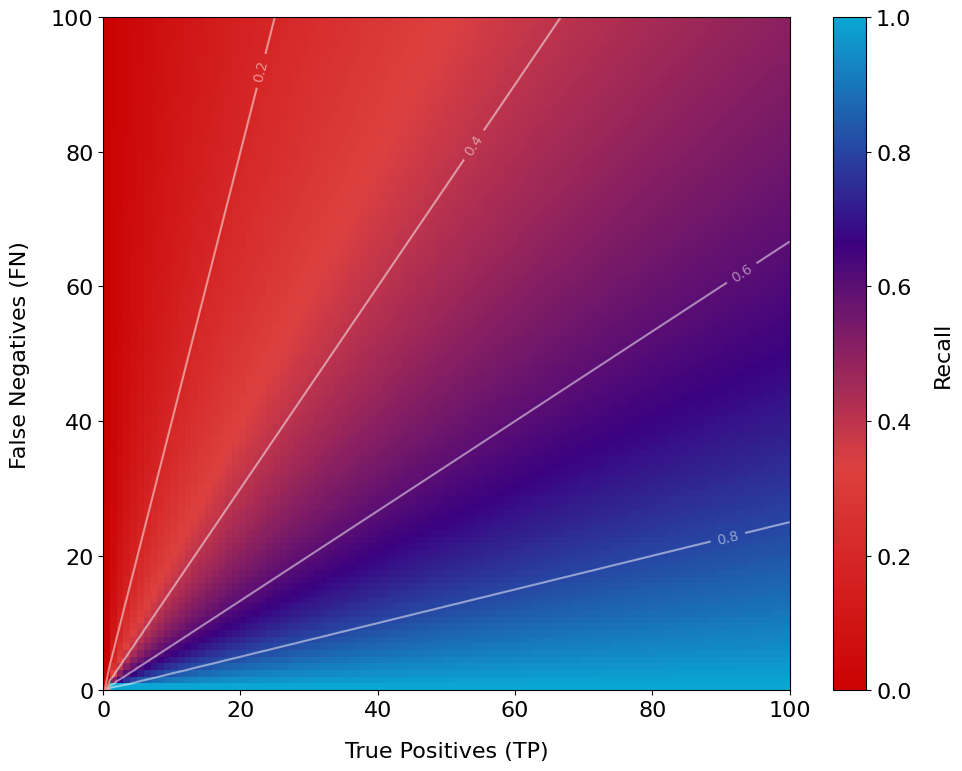

In [3]:
# Generate data for TP and FN
tp = np.linspace(0, 100, 101)
fn = np.linspace(0, 100, 101)
TP, FN = np.meshgrid(tp, fn)

# Calculate Recall
Recall = TP / (TP + FN)
Recall = np.nan_to_num(Recall, 0)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the heatmap
im = ax.imshow(Recall, origin='lower', extent=[0, 100, 0, 100], 
               cmap=nml_cmap.reversed(), aspect='auto', vmin=0, vmax=1)

# Set labels and title
ax.set_xlabel('True Positives (TP)')
ax.set_ylabel('False Negatives (FN)')

# Add colorbar
cbar = fig.colorbar(im)
cbar.set_label('Recall')

# Add contour lines
contours = ax.contour(TP, FN, Recall, colors='white', alpha=0.5, levels=[0.2, 0.4, 0.6, 0.8])
ax.clabel(contours, inline=True, fontsize=10)

plt.tight_layout()
plt.savefig('plots/Recall_heatmap.png', dpi=300)
plt.show()


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_21464/2316602578.py:7: RuntimeWarning: invalid value encountered in divide
  Recall = TP / (TP + FN)


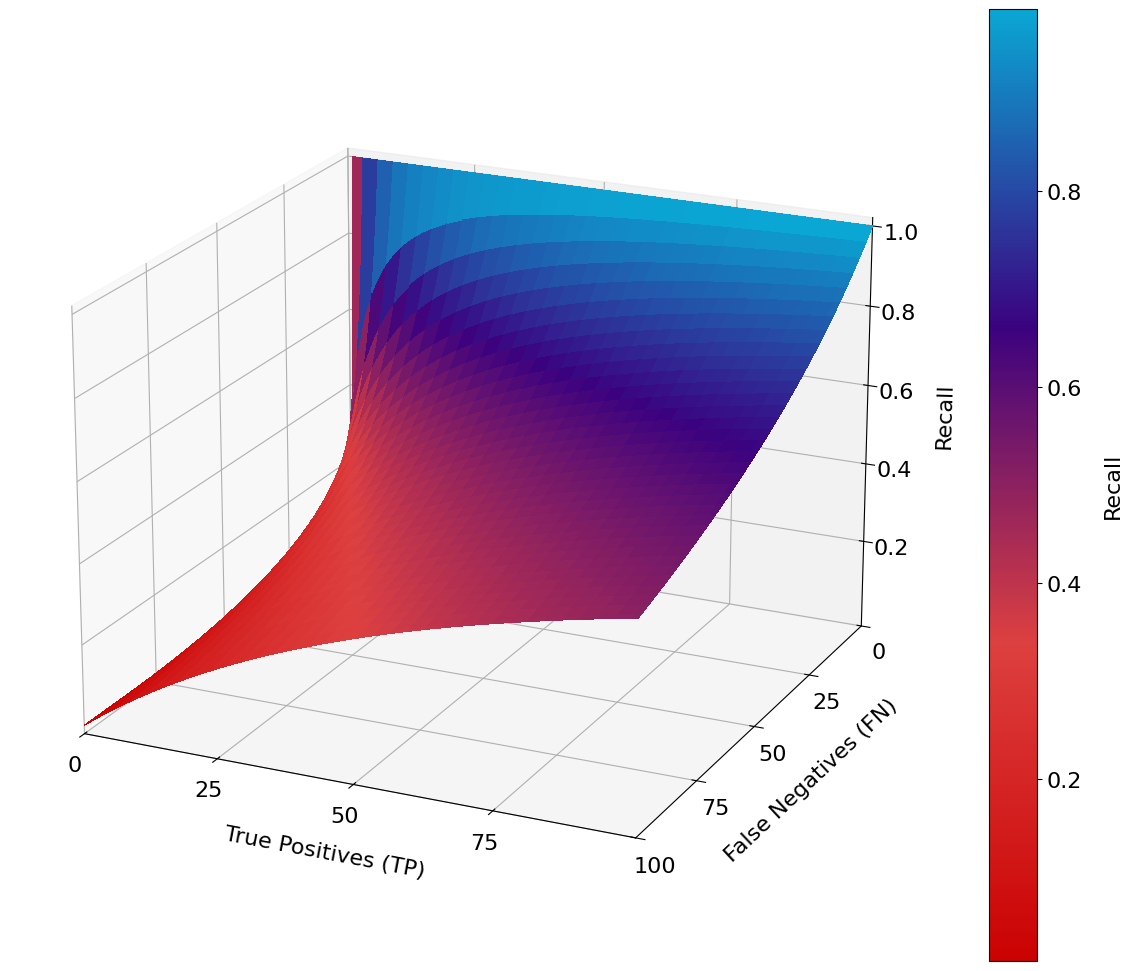

In [132]:
# Generate data for TP and FN
tp = np.linspace(0, 100, 101)
fn = np.linspace(0, 100, 101)
TP, FN = np.meshgrid(tp, fn)

# Calculate Recall
Recall = TP / (TP + FN)
Recall = np.nan_to_num(Recall, 0)

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(TP, FN, Recall, cmap=nml_cmap.reversed(), 
                       linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel('True Positives (TP)')
ax.set_ylabel('False Negatives (FN)')
ax.set_zlabel('Recall')

# Reverse the axis limits
ax.set_ylim(100, 0)
ax.set_xlim(0, 100)

ax.set_xticks([0, 25, 50, 75])
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_zticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='z', which='major', pad=5)

# Add colorbar
cbar = fig.colorbar(surf)
cbar.set_label('Recall')

# Adjust the viewing angle
ax.view_init(elev=20, azim=-65)

plt.tight_layout()
plt.savefig('plots/Recall_3d_surface.png', dpi=300)
plt.show()

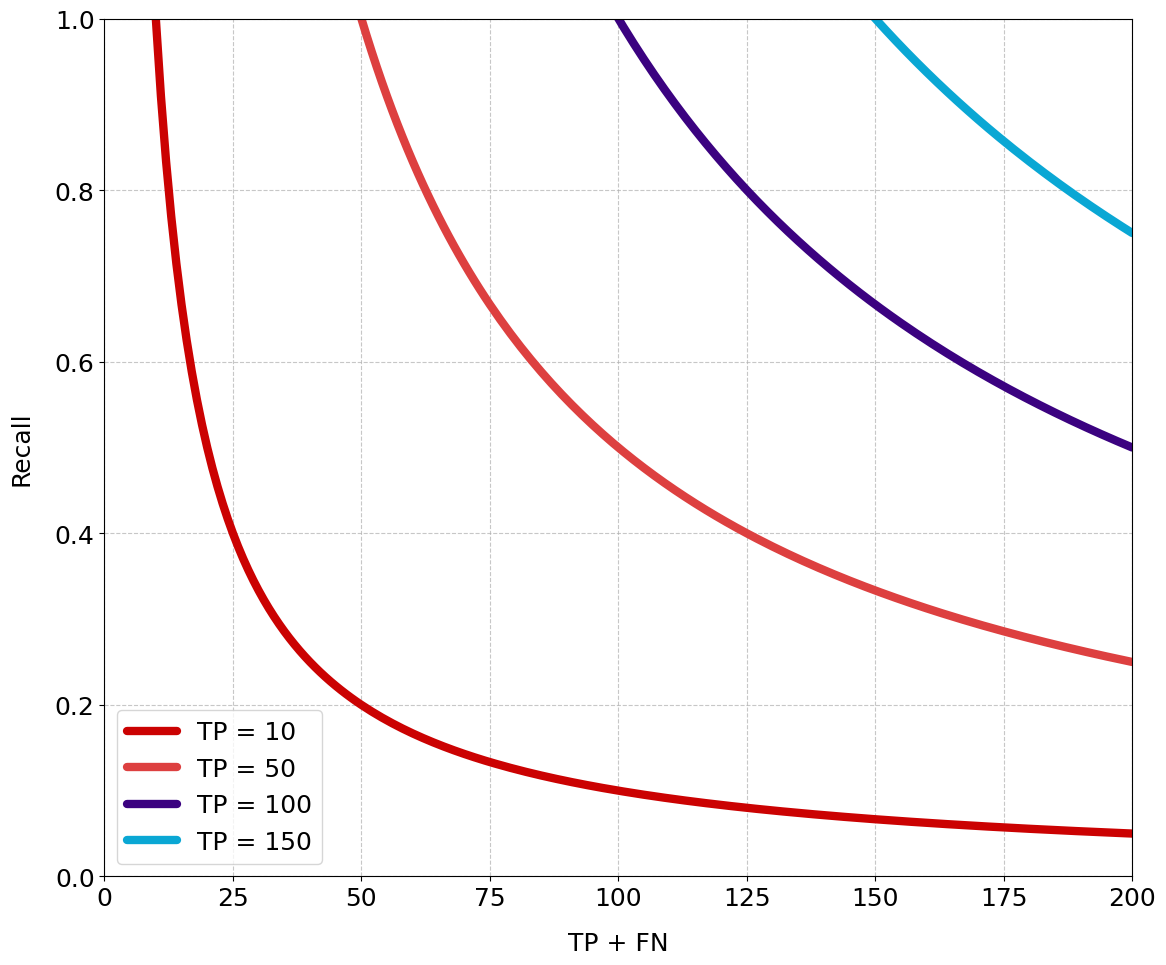

In [6]:
# Create 2D line plot of Recall vs TP + FN
fig, ax = plt.subplots(figsize=(12, 10))
# Increase font size for better readability
plt.rcParams.update({'font.size': 18})


# Create range for TP + FN
x = np.linspace(1, 200, 200)

# Define the colors
start_color = "#0AA7D4"
middle_color = "#3B0280"
end_color = "#DD4040"
end_end_color = "#CB0202"

# Define colors inspired by nml_cmap
colors = [end_end_color, end_color, middle_color, start_color]

# Calculate Recall for different TP values
for tp, color in zip([10, 50, 100, 150], colors):
    recall = tp / x
    ax.plot(x, recall, label=f'TP = {tp}', color=color, linewidth=6, solid_capstyle='round')

# Set labels and title
ax.set_xlabel('TP + FN')
ax.set_ylabel('Recall')

# Set axis limits
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# Increase legend font size
ax.legend(fontsize=16)

# Add legend
ax.legend()

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('plots/Recall_2d_line_plot.png', dpi=300)
plt.show()


### False Positive Rate

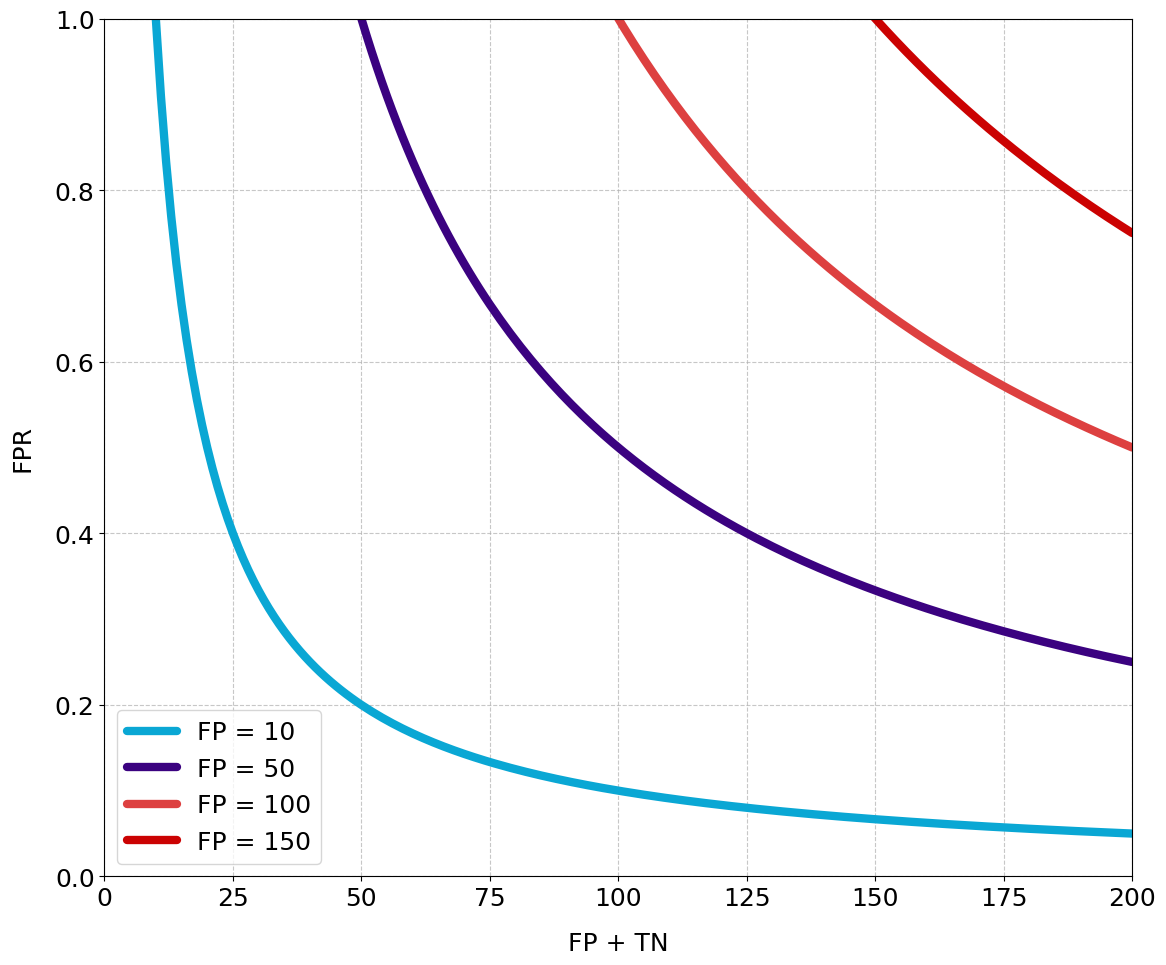

In [18]:
# Create 2D line plot of FPR vs FP + TN
fig, ax = plt.subplots(figsize=(12, 10))
# Increase font size for better readability
plt.rcParams.update({'font.size': 18})


# Create range for FP + TN
x = np.linspace(1, 200, 200)

# Define the colors
start_color = "#0AA7D4"
middle_color = "#3B0280"
end_color = "#DD4040"
end_end_color = "#CB0202"

# Define colors inspired by nml_cmap
colors = [end_end_color, end_color, middle_color, start_color]
colors = colors[::-1] # Reverse the colors since smaller FP values are better

# Calculate FPR for different FP values
for fp, color in zip([10, 50, 100, 150], colors):
    FPR = fp / x
    ax.plot(x, FPR, label=f'FP = {fp}', color=color, linewidth=6, solid_capstyle='round')

# Set labels and title
ax.set_xlabel('FP + TN')
ax.set_ylabel('FPR')

# Set axis limits
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# Increase legend font size
ax.legend(fontsize=16)

# Add legend
ax.legend()

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('plots/FPR_2d_line_plot.png', dpi=300)
plt.show()


/var/folders/yn/9gj_99ys1mz0_tkl2kvh5wd40000gn/T/ipykernel_18701/1238456757.py:7: RuntimeWarning: invalid value encountered in divide
  FPR = FP / (FP + TN)


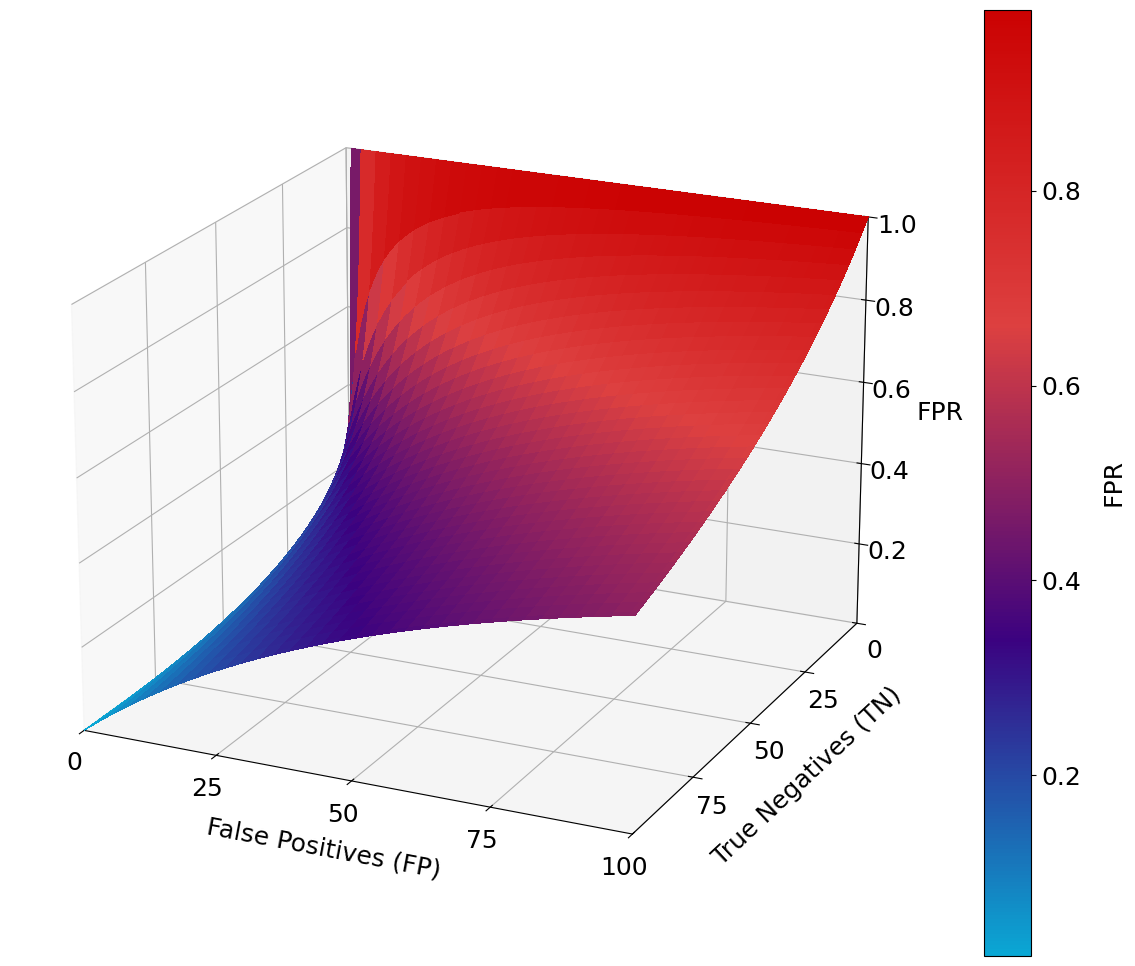

In [17]:
# Generate data for FP and TN
fp = np.linspace(0, 100, 101)
tn = np.linspace(0, 100, 101)
FP, TN = np.meshgrid(fp, tn)

# Calculate FPR
FPR = FP / (FP + TN)
FPR = np.nan_to_num(FPR, 0)

# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(FP, TN, FPR, cmap=nml_cmap, 
                       linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel('False Positives (FP)')
ax.set_ylabel('True Negatives (TN)')
ax.set_zlabel('FPR')

# Set axis limits
ax.set_xlim(0, 100)
ax.set_ylim(100, 0)
ax.set_zlim(0, 1)

ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75])
ax.set_zticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='z', which='major', pad=5)

# Add colorbar
cbar = fig.colorbar(surf)
cbar.set_label('FPR')

# Adjust the viewing angle
ax.view_init(elev=20, azim=-65)

plt.tight_layout()
plt.savefig('plots/FPR_3d_surface.png', dpi=300)
plt.show()